In [2]:
import re

In [3]:
with open("input.txt", "r") as infile: 
    contents = infile.read().strip().split('\n')
    
contents[0:4]

['initial state: #.#####.##.###...#...#.####..#..#.#....##.###.##...#####.#..##.#..##..#..#.#.#.#....#.####....#..#',
 '',
 '#.#.. => .',
 '..### => .']

In [4]:
patterns = dict()
for line in contents[2:]: 
    match = re.search('([#\.]+) => (#|\.)', line)
    if match:
        patterns[match.group(1)] = match.group(2)

In [5]:
state = re.search('initial state: ([#\.]+)', contents[0]).group(1)

def run(state, epochs=0):
    def icount(state, starting=0): 
        output = 0 
        for i in range(len(state)):
            if state[i] == '#': 
                output += i + starting
        return output

    def tokenize(state):
        tokens = list()
        for i in range(len(state)): 
            if i == 0: 
                tokens.append('..' + state[0:3])
            elif i == 1: 
                tokens.append('.' + state[0:4])
            elif i == len(state) - 2: 
                tokens.append(state[-4:] + '.')
            elif i == len(state) - 1: 
                tokens.append(state[-3:] + '..')
            else: 
                tokens.append(state[i-2:i+3])
        return tokens
    
    def convert(tokens): 
        output = ''
        for token in tokens: 
            output += patterns.get(token, '.')
        return output
    
    for i in range(epochs):
        state = convert(tokenize('..' + state + '..'))
    return icount(state, -2 * epochs)

run(state, 20)

4200

In [6]:
%timeit run(state, 1000)

1 loop, best of 3: 3.91 s per loop


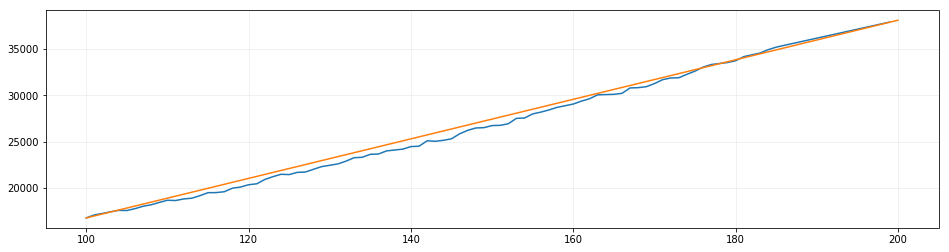

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))
plt.plot(range(100,200), [run(state, i+100) for i in range(100)])
plt.plot([100, 200], [run(state, 100), run(state, 200)])
plt.grid(which='major', color='#eeeeee')
plt.show()

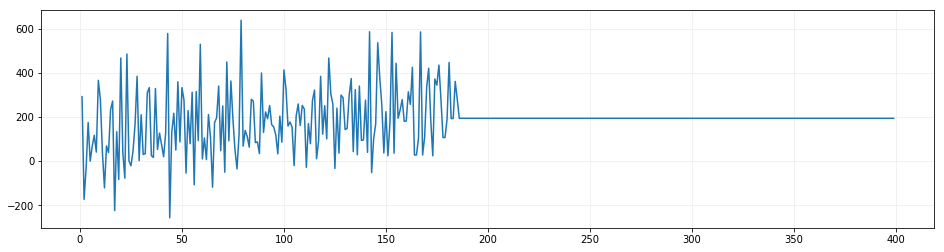

In [9]:
plt.figure(figsize=(16, 4))
plt.plot(range(1, 400), [run(state, i) - run(state, i-1) for i in range(1, 400)])
plt.grid(which='major', color='#eeeeee')
plt.show()

In [10]:
run(state, 200) + (400-200) * (run(state, 201) - run(state, 200)), run(state, 400)

(76921, 76921)

In [11]:
run(state, 200) + (50000000000-200) * (run(state, 201) - run(state, 200))

9699999999321